## Exercise 1 : Python warmup

### Part A

In [1]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import itertools

[nltk_data] Downloading package stopwords to /home/jaisu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
text_data = open("random_text.txt", "r").read()

#### Approach for Part A

1. **Preprocessing text** - Remove punctuation marks, special characters, lower case the text.
2. **To get number of unique non stop words**, create a hash map (dictionary in python) and put every new word (which is not in the stop words list) into the hash map. Then the length of this hash map tells the number of unique non stop words.
3. **To get the 5 most frequent words**, create a hash map (dictionary in python) to store the count of every word. Sort the hash map and slice top 5 entries in it.

#### Code and output for Part A :

In [3]:
def preprocess_text(text_data):
    """
    Removes punctuation marks, special characters, lower case text and creates list of words
    Returns: list of words
    """
    text_data = text_data.translate(str.maketrans('', '', string.punctuation))

    text_data = text_data.replace('\n', ' ')

    text_list = text_data.split(' ')
    text_list = list(map(lambda x: x.lower(), text_list))
    
    return text_list

In [4]:
def get_num_non_stop_words(text_list):
    """
    Returns number of unique non stop words
    """

    text_list = preprocess_text(text_data)
    stop_words = stopwords.words('english')

    words_unique_hash = {}

    for word in text_list:
        if word not in stop_words and word not in words_unique_hash.keys():
            words_unique_hash[word] = 1

    non_stop_words = len(words_unique_hash)

    return non_stop_words

In [5]:
print("The number of unique non stop words are: {}".format(get_num_non_stop_words(text_data)))

The number of unique non stop words are: 149


In [6]:
def get_5_non_stop_words(text_list):
    """
    Returns 5 frequent non stop words
    """

    text_list = preprocess_text(text_data)
    stop_words = stopwords.words('english')

    words_count_hash = {}

    for word in text_list:
        if word not in stop_words:
            if word not in words_count_hash.keys():
                words_count_hash[word] = 1
            else:
                words_count_hash[word] = words_count_hash[word] + 1
            
    words_count_hash = dict(sorted(words_count_hash.items(), key=lambda item: item[1], reverse=True))
    words_count_hash = dict(itertools.islice(words_count_hash.items(), 5))
    

    return words_count_hash

In [7]:
print("The 5 most frequent words are: {}".format(get_5_non_stop_words(text_data)))

The 5 most frequent words are: {'sed': 12, 'ante': 9, 'eu': 9, 'sit': 8, 'amet': 8}


### Part B

In [8]:
import matplotlib.pyplot as plt
import numpy as np

#### Approach for part B

1. **Initial setup** - Read the image. Initialize the variables - filter, pad length and stride. Pad the image.
2. **Convolve the filter over image** - ```S``` matrix stores the sub-region (3,3) of the original image. Variables ```i``` and ```j``` keep moving over the image with ```stride=1```. ```i``` takes values from ```0:rows-2``` and ```j``` takes values from ```0:cols-2```.
3. Do elementwise multiplication of ```S``` and ```F``` and sum all the elements. Replace the center element of sub-region of the image with this sum.
4. After ```convolve_image()``` function is applied on all sub-regions of the image, we receive the blurred image in the output variable ```out_img```. (Basically we have reduced the pixel values of image by convolve function and hence image becomes blurr.)

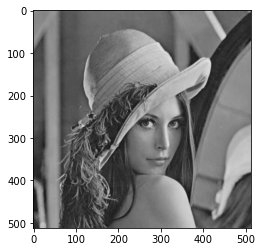

In [9]:
# Read and show image


inp_img = plt.imread("lena_gray.jpg")
plt.imshow(inp_img, cmap='gray', vmin=0, vmax=255)

# Initialize output image variable
out_img = np.zeros(inp_img.shape)

In [10]:
# Define filter, pad and stride here!!
F = np.ones((3,3))/9

pad_top=1
pad_bottom=1
pad_left=1
pad_right=1

stride = 1


In [11]:
# Add pad to the input image

inp_img = np.pad(inp_img, ((pad_top, pad_bottom), (pad_left, pad_right)), 'constant')
inp_img

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 144, 143, ..., 135, 110,   0],
       [  0, 145, 144, ..., 128, 104,   0],
       ...,
       [  0,  39,  41, ...,  87,  88,   0],
       [  0,  40,  42, ...,  87,  89,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [12]:
def convolve_image(inp_img):
    '''
    Convolves the filter F over given image inp_img
    '''

    rows = len(inp_img)
    cols = len(inp_img[0])
    i=0
    j=0

    # convolve the image

    for i in range(rows-2):
        for j in range(cols-2):
            S = inp_img[i:i+3,j:j+3]
            ## element-wise multiplication and sum all elements

            out_img[i-1][j-1] = sum(sum(S*F))

In [13]:
# Blurred images saved in out_img
convolve_image(inp_img)
out_img

array([[144.11111111, 143.44444444, 142.88888889, ..., 129.55555556,
         79.77777778,  96.22222222],
       [144.44444444, 143.88888889, 143.33333333, ..., 132.        ,
         81.66666667,  96.44444444],
       [144.22222222, 143.77777778, 143.22222222, ..., 132.66666667,
         82.22222222,  96.33333333],
       ...,
       [ 41.33333333,  43.33333333,  44.33333333, ...,  86.33333333,
         57.66666667,  26.66666667],
       [ 27.88888889,  29.22222222,  29.88888889, ...,  58.22222222,
         39.        ,  18.        ],
       [ 95.88888889,  95.44444444,  95.11111111, ...,  86.22222222,
         53.        ,  64.        ]])

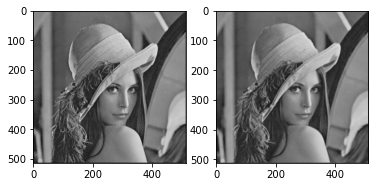

In [14]:
## Comparing original image and blurred image

f, axarr = plt.subplots(1,2)
axarr[0].imshow(inp_img, cmap='gray', vmin=0, vmax=255)
axarr[1].imshow(out_img, cmap='gray', vmin=0, vmax=255)

In [15]:
# For the next convolve, out_img becomes input
convolve_image(out_img)
out_img

array([[143.08641975, 142.5308642 , 142.02469136, ..., 129.55555556,
         79.77777778, 143.59259259],
       [142.44444444, 141.90123457, 141.44444444, ..., 132.        ,
         81.66666667, 142.92592593],
       [141.30864198, 140.74074074, 140.24691358, ..., 132.66666667,
         82.22222222, 141.80246914],
       ...,
       [ 41.33333333,  43.33333333,  44.33333333, ...,  86.33333333,
         57.66666667,  26.66666667],
       [ 27.88888889,  29.22222222,  29.88888889, ...,  58.22222222,
         39.        ,  18.        ],
       [143.12345679, 142.5308642 , 141.96296296, ...,  86.22222222,
         53.        , 143.7037037 ]])

In [16]:
convolve_image(out_img)
out_img

array([[140.22085048, 139.99176955, 139.96296296, ..., 129.55555556,
         79.77777778, 140.64334705],
       [138.80932785, 138.53223594, 138.478738  , ..., 132.        ,
         81.66666667, 139.2702332 ],
       [137.38545953, 137.04938272, 137.00137174, ..., 132.66666667,
         82.22222222, 137.89849108],
       ...,
       [ 41.33333333,  43.33333333,  44.33333333, ...,  86.33333333,
         57.66666667,  26.66666667],
       [ 27.88888889,  29.22222222,  29.88888889, ...,  58.22222222,
         39.        ,  18.        ],
       [141.34019204, 141.14540466, 141.17695473, ...,  86.22222222,
         53.        , 141.74759945]])

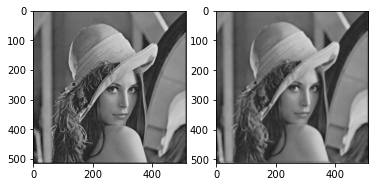

In [17]:
## Comparing original image and blurred image (convolved three times)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(inp_img, cmap='gray', vmin=0, vmax=255)
axarr[1].imshow(out_img, cmap='gray', vmin=0, vmax=255)

## Exercise 2

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import math

### Approach for Exercise 2:

1. Class ```Inverse``` is written to contain all methods required to find inverse. Adjoint of the matrix is calculated by ```getAdjoint()``` function. 
2. Inverse is calculated by dividing the adjoint of the matrix by its determinant in ```divideMatrix()``` function.
3. The class ```LinearReg``` is written to write functions for learning LR model and predicting the values. 
4. Scatter plots for actual and predicted values have been plotted below.

In [62]:
class Inverse():
    
    '''
    Inspired from this post: https://stackoverflow.com/questions/32114054/matrix-inversion-without-numpy
    '''
    
    def __init__(self, mat):
        self.mat = mat
    
    def getMinorIndex(self, matrixLocal, x, y):
        minor = []
        for i in range(3):
            minorRow = []
            if i == x:
                continue
            for j in range(3):
                if j == y:
                    continue
                minorRow.append(matrixLocal[i][j])
            minor.append(minorRow)
        return minor
    
    def getDeterminant2By2(self, matrixLocal):
        determinant = matrixLocal[0][0] * matrixLocal[1][1] - matrixLocal[0][1] * matrixLocal[1][0]
        return determinant
    
    def getDeterminant(self, matrixLocal):
        determinant = 0
        for x in range(3):
            t = self.getDeterminant2By2(self.getMinorIndex(matrixLocal, 0, x))
            e = matrixLocal[0][x]
            determinant += (t * e * math.pow(-1, x))
        return determinant

    def getAdjoint(self, matrixLocal):
        cofactorMatrix = []
        for i in range(3):
            row = []
            for j in range(3):
                e = matrixLocal[i][j]
                t = self.getDeterminant2By2(self.getMinorIndex(matrixLocal, i, j))
                row.append(t * math.pow(-1, i + j))
            cofactorMatrix.append(row)
        return cofactorMatrix
    
    def transpose(self, matrixLocal):
        '''
        Finds the transpose
        '''
        transposeMatrix = []
        for i in range(3):
            row = []
            for j in range(3):
                e = matrixLocal[j][i]
                row.append(e)
            transposeMatrix.append(row)
        return transposeMatrix
    
    def divideMatrix(self, matrixLocal, divisor):
        '''
        Divides the adjoint of the matrix by its determinant
        '''
        ansMatrix = []
        for i in range(3):
            row = []
            for j in range(3):
                e = matrixLocal[i][j]/divisor
                row.append(e)
            ansMatrix.append(row)
        return ansMatrix
    
    def compute_inverse(self):
        cofactor = self.getAdjoint(self.mat)
        adjoint = self.transpose(cofactor)
        det = self.getDeterminant(self.mat)
        inverse = self.divideMatrix(adjoint, det)
        
        return inverse


### Code for data generation, model learning, predicting values and plotting.

In [60]:

class LinearReg():
    def __init__(self, mean=2, sigma=0.01, n=(100, 2)):
        self.mean = mean
        self.sigma = sigma
        self.X = None
        self.n = n
        self.x = None
        self.y = None
        self.beta = None
        self.gen_data()

    def gen_data(self):
        '''
        Generates matrix X and matrix Y
        '''
        np.random.seed(1234)
        self.X = np.random.normal(self.mean, self.sigma, self.n)
        self.x = np.c_[self.X, np.ones(100)]
        self.y = np.random.uniform(low=0.0, high=1.0, size=100)
        
    
    def learn_simple_linreg(self):
        '''
        Finds beta vector
        '''

        x_trans = np.transpose(self.x)

        A = np.matmul(x_trans, self.x)
        B = np.matmul(x_trans, self.y)
        
        i = Inverse(A)
        inv = i.compute_inverse()
        
        self.beta = np.matmul(inv, B)

    def predict_simple_linreg(self, x):
        y_pred = self.beta * x
        return y_pred

    def run_pred(self):
        y_preds = []
        for x in self.x:
            y = self.predict_simple_linreg(x)
            y_preds = y_preds + [y]
        return y_preds

    def compute_error(self, y_preds):
        y_preds = np.array(y_preds)
        mse = ((y_preds - self.y) ** 2).mean(axis=0)
        return mse

    def plot_preds(self, y_preds):
        plt.plot(self.x, self.y, color="blue", label="actual")
        plt.plot(self.x, y_preds, color="red", label="pred")
        plt.legend(loc="upper left")
        plt.xlim([1.95,2.05])
        plt.show()

    def numpy_linreg(self):
        #A = np.vstack(self.x).T
        beta_0, beta_1, beta_2 = np.linalg.lstsq(self.x, self.y, rcond=None)[0]
        return [beta_0, beta_1, beta_2]

    def run_numpy_pred(self, beta_vector):
        y_preds = [beta_vector*x for x in self.x]
        return y_preds

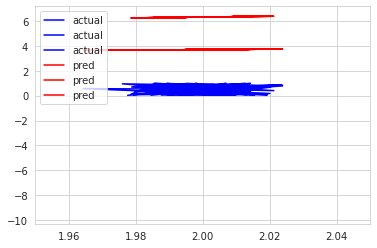

In [63]:
lin_reg = LinearReg()
## Using custom written function

lin_reg.learn_simple_linreg()
y_preds = lin_reg.run_pred()
lin_reg.plot_preds(y_preds)



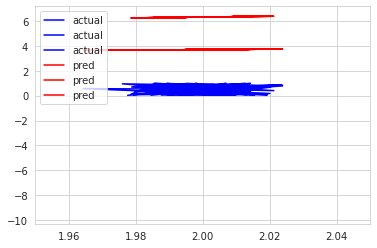

In [61]:
## Using numpy linalg lstsq method

beta_vector = lin_reg.numpy_linreg()
y_preds = lin_reg.run_numpy_pred(beta_vector)
lin_reg.plot_preds(y_preds)